# Problem Statement
To understand the factors on which the demand for shared bikes depends. Specifically, we want to understand the factors affecting the demand for these shared bikes in the American market:

- Which variables are significant in predicting the demand for shared bikes?
- How well those variables describe the bike demands?
  

### Steps
1. Reading, understanding and visualizing the data.
2. Preparing the data for modeling.
3. Train the model.
4. Residual Analysis.
5. Predection and evaluation on the test set.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing required packages.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## 1. Reading, understanding and visualizing the data.

In [3]:
# reading the data
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Are there null values?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# None of the fields are null

#### Dropping irrelevent columns

In [6]:
# dropping instant column as record index has no significance on total number of rental bikes
df.drop('instant', axis=1, inplace=True)

In [7]:
# dropping dtedate column as we already have year, month, weekday
df.drop('dteday', axis=1, inplace=True)

In [8]:
# dropping casual and registered columns since cnt is sum of both
df.drop(['casual', 'registered'], axis=1, inplace=True)

#### Outlier Treatement

In [9]:
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


Looking at the min and max values of each field, it doesn't look like we have signinficant outliers.

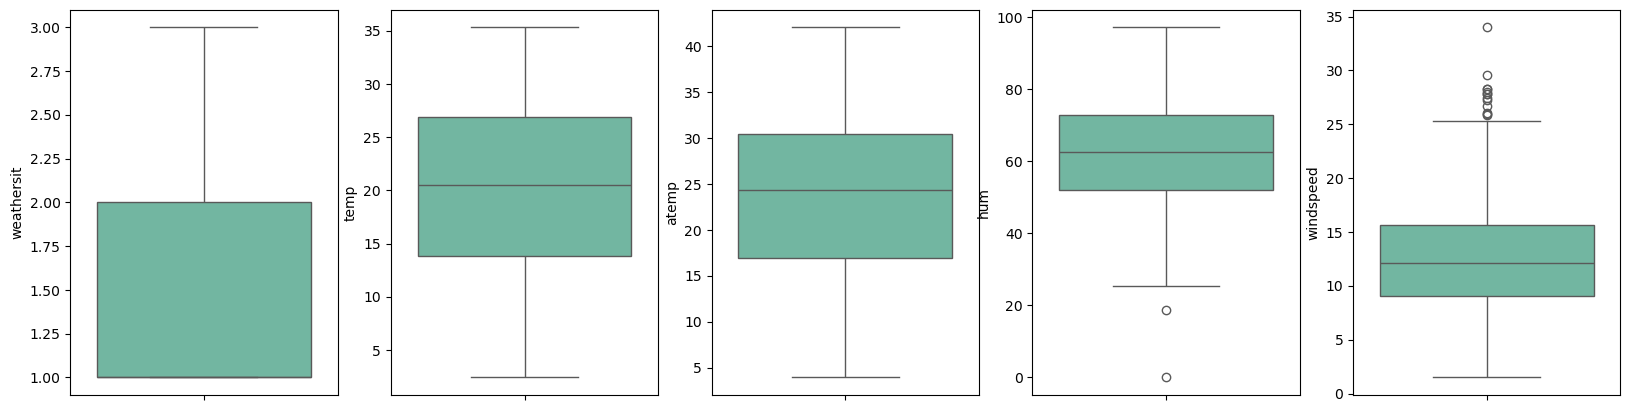

In [10]:
sns.set_palette("Set2")
# Box plot
fig, axes = plt.subplots(1, 5, figsize=(20,5))
sns.boxplot(df.weathersit, ax=axes[0])
sns.boxplot(df.temp, ax=axes[1])
sns.boxplot(df.atemp, ax=axes[2])
sns.boxplot(df.hum, ax=axes[3])
sns.boxplot(df.windspeed, ax=axes[4])

plt.show()
# There are few outliers in windspeed, but the values looks like expected windspeed. No outlier treatement needed.

#### Handling Categorical Variables

In [11]:
# converting season id to season name
di_season = {1: 'spring', 2: 'summer', 3:'fall', 4:'winter'}
df[['season']] = df[['season']].apply(lambda x: x.map(di_season))
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [12]:
# converting weathersit to weater situation names (Clear, Mist, Light_Rain, Heavy_Rain)
di_weather = {1: 'Clear', 2: 'Mist', 3:'Light_Rain', 4:'Heavy_Rain'}
df[['weathersit']] = df[['weathersit']].apply(lambda x: x.map(di_weather))
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [13]:
# converting weekday to names (sunday, monday, tuesday, wednesday, thursday, friday, saturday)
di_weekday = {0: 'sunday', 1: 'monday', 2:'tuesday', 3:'wednesday', 4:'thursday', 5: 'friday', 6:'saturday'}
df[['weekday']] = df[['weekday']].apply(lambda x: x.map(di_weekday))
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,saturday,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,sunday,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [14]:
# converting mnth to month names
di_mnth = {1: 'january',2: 'february',3: 'march',4: 'april',5: 'may',6: 'june',7: 'july',8: 'august',9: 'september',10: 'october',11: 'november',12: 'december'}
df[['mnth']] = df[['mnth']].apply(lambda x: x.map(di_mnth))
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,january,0,saturday,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,january,0,sunday,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,january,0,monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,january,0,tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,january,0,wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [15]:
df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


#### Univariate & Bivariate Analysis

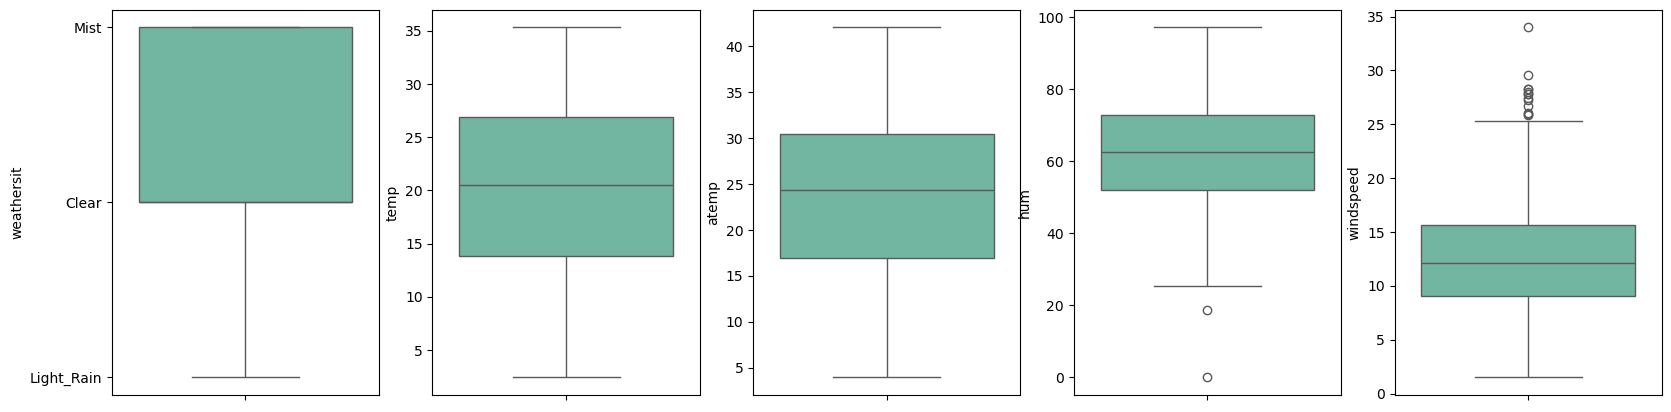

In [16]:
# Univariate analysis and outlier treatement.
sns.set_palette("Set2")
# Box plot
fig, axes = plt.subplots(1, 5, figsize=(20,5))
sns.boxplot(df.weathersit, ax=axes[0])
sns.boxplot(df.temp, ax=axes[1])
sns.boxplot(df.atemp, ax=axes[2])
sns.boxplot(df.hum, ax=axes[3])
sns.boxplot(df.windspeed, ax=axes[4])

plt.show()

There are few outliers in windspeed, but the values looks like expected windspeed. No outlier treatement needed.

In [17]:
# Bivariate Analysis

# Plots a count plot in total and a count plot by year.
def _plot(column_name):
    fig, axes = plt.subplots(1, 2, figsize=(16, 4))
    # Count plot for univariate analysis
    _plot_box(column_name, axis=axes[0])
    # axes[0].set_title('Box Plot')
    # Box plot for bivariate analysis
    _plot_count_by_year(column_name, axis=axes[1])
    # axes[1].set_title('Box Plot')
    plt.show()


def _plot_count(column_name, dataframe=df, axis=None):
    ax = sns.countplot(x=column_name, data=dataframe, ax=axis)
    plt.xlabel(column_name.title())
    plt.ylabel('Count')
    # add percentage to the bar
    for p in ax.patches:
        height = p.get_height()
        x = p.get_x() + p.get_width()/2
        percentage = (height/len(dataframe)) * 100
        ax.text(x, height + 0.1, f'{percentage:.2f}%', ha='center', va='bottom')


def _plot_count_by_year(column_name, dataframe = df, axis=None):
    ax = sns.barplot(x=column_name, hue='yr', y='cnt', data=dataframe, ax=axis)
   
    # Customize the plot
    plt.title(f"{column_name.title()} by Year (2018/2019)")
    plt.ylabel('Rental count')
    plt.xlabel(f"{column_name.title()}")
    plt.show()

def _plot_bar(column_name, dataframe=df, axis=None):
    sns.barplot(data=dataframe, x=column_name, y='cnt', ax=axis)
    ax.set_ylabel('Number of Rentals')
    ax.set_xlabel(f"Bar Plot for {column_name.title()}")
    plt.show()

def _plot_box(column_name, dataframe=df, axis=None):
    ax = sns.boxplot(data=dataframe,x=column_name, y='cnt', ax=axis)
    ax.set_ylabel('Number of Rentals')
    ax.set_xlabel(column_name.title())
    ax.set_title(f"Box Plot for {column_name.title()}")


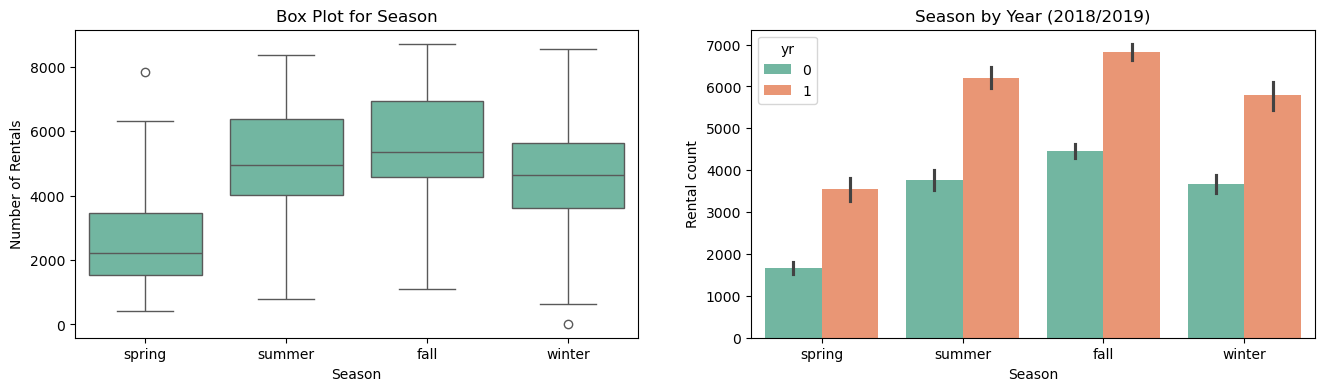

In [18]:
# Categorical variables
_plot('season')

#### Analysis: Season
    - There is a significant increase in booking during summer and fall, spring seems to have least number of rental bookings
    - Bookings have increases significantly in 2019 across all seasons.

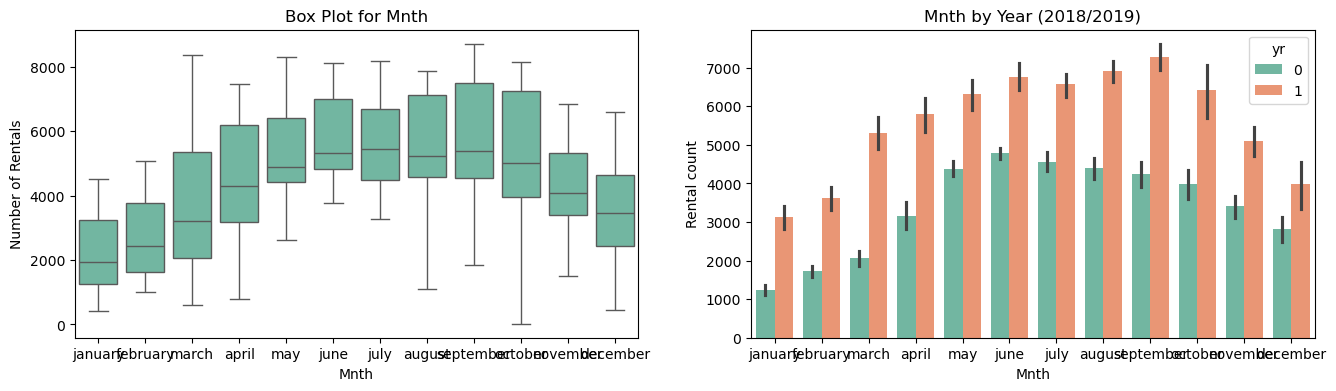

In [19]:
 #Month (mnth)
_plot('mnth')

#### Analysis: Month
    - Bookings tend to increase during the summers, mainly from the month of May to September and tend to slow down around the endo of the year.
    - Rental bookings have increased in all months in 2019, though the end of year slow down holds true in both the years.

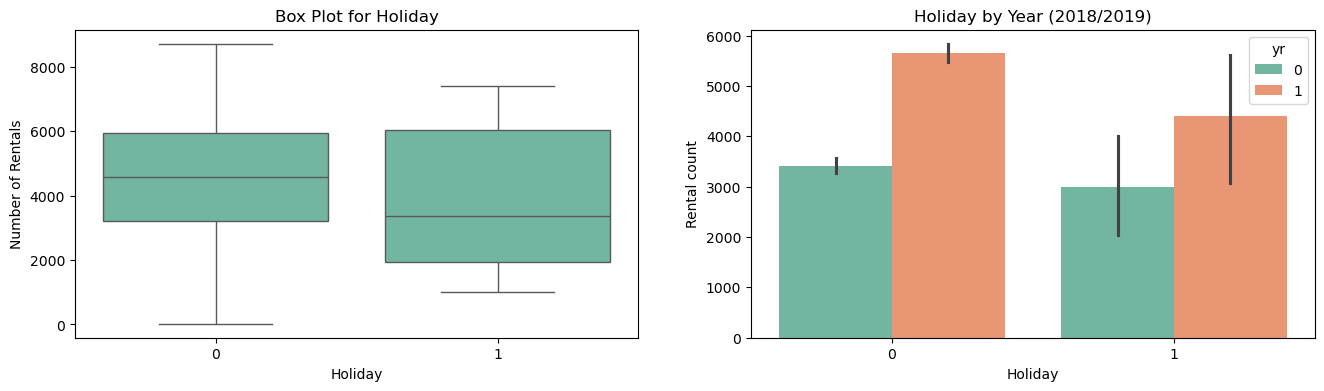

In [20]:
# Holiday (holiday)
_plot('holiday')

#### Analysis: Holiday
    - Bike rental bookings are higher during non holidays.
    - The Year over year growth holds true for holidays as well. 

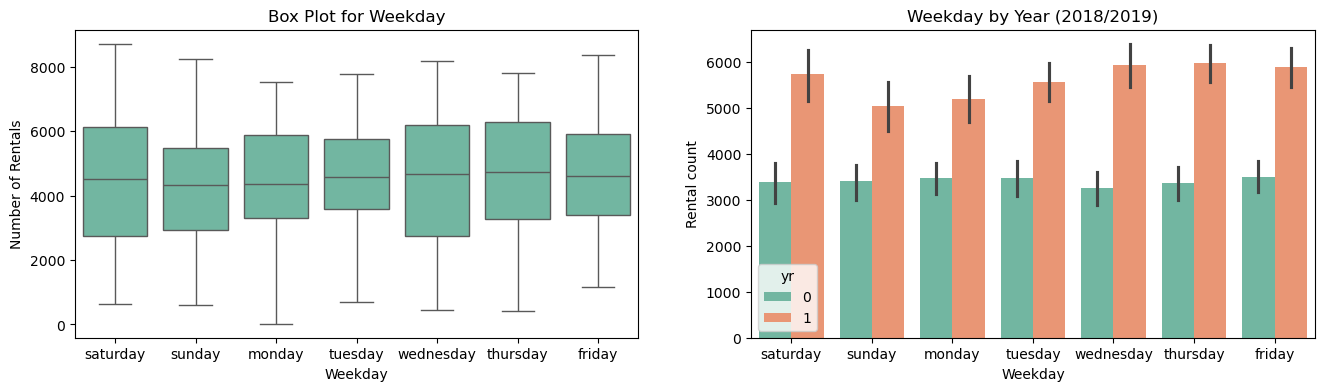

In [21]:
# Weekday (weekday)
_plot('weekday')

#### Analysis: Weekday
    - Sunday has slightly low booking count but there is no significant change in the number of bookings. 
    - Year-over-year growth is evenly spread across all days.

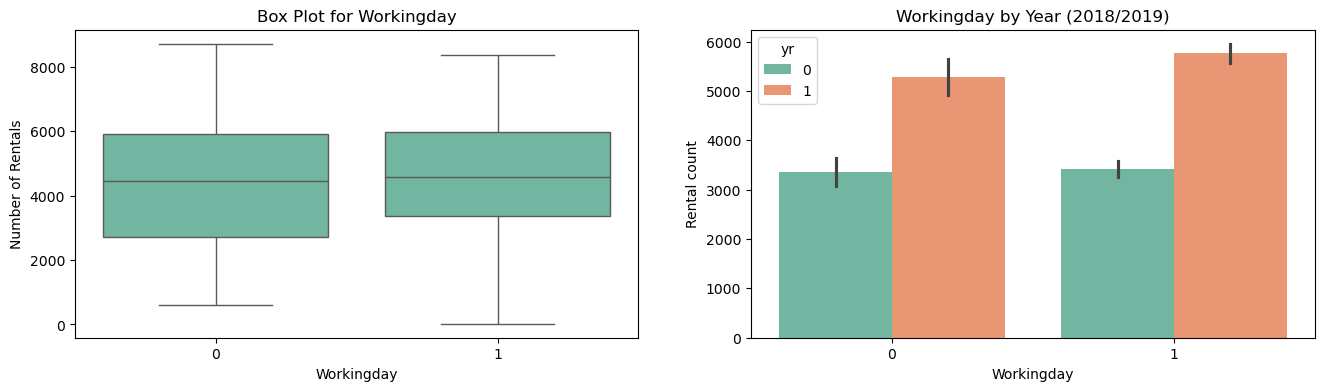

In [22]:
# Working Day (workingday)
_plot('workingday')

#### Analysis: Working Day
    - There is no significant change in working vs not working days.

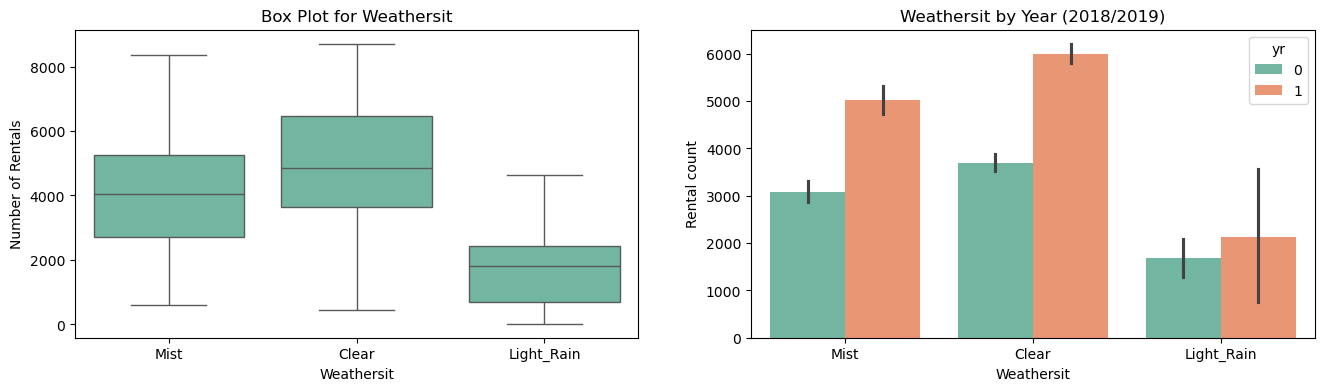

In [23]:
# Weather Situation (weathersit)
_plot('weathersit')

#### Analysis: Weather Situation
    - There is a major correlation between number of bookings and weather condition. Booking count reduces as the weather goes bad.
    - Bookings shows similar behaviour in 2019 as well though the range of booking during bad weather(light rain) is significantly higher in 2019

### Analyzing Continous Features

<Figure size 2000x1600 with 0 Axes>

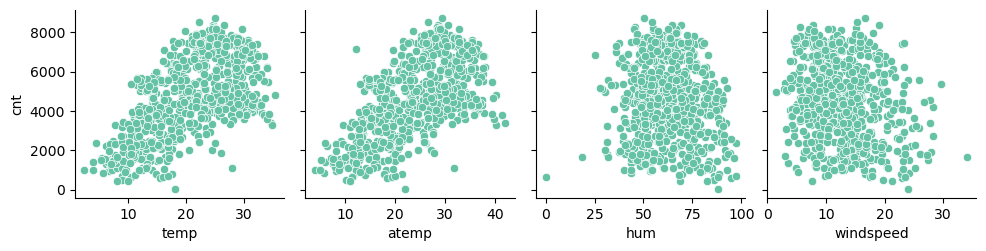

In [24]:
# visualizing continuous variables.
continous_features = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(20,16))
sns.pairplot(data = df, y_vars='cnt', x_vars=continous_features)
plt.show()


#### Analysis: 
    - There is a correlation between target feature rental count and some predictor feature (temprature and feeling temprature).

## 2. Preparing the data for modeling
- Encoding - Converting categorical variable into dummy variable.
- Train and Test Data - Split data into training and testing sets.
- Rescalling Variables

In [25]:
# dummy variable for season
season_status = pd.get_dummies(df.season, drop_first=True, dtype='int64')
# Add status to dataframe
df = pd.concat([df, season_status], axis=1)

In [26]:
# dummy variable for weathersit
season_status = pd.get_dummies(df.weathersit, drop_first=True, dtype='int64')
# Add weather status to dataframe
df = pd.concat([df, season_status], axis=1)

In [27]:
# dummy variable for weekday
season_weekday = pd.get_dummies(df.weekday, drop_first=True, dtype='int64')
# Add weekday to dataframe
df = pd.concat([df, season_weekday], axis=1)

In [28]:
# dummy variable for mnth
season_mnth = pd.get_dummies(df.mnth, drop_first=True, dtype='int64')
# Add month to dataframe
df = pd.concat([df, season_mnth], axis=1)

In [29]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,december,february,january,july,june,march,may,november,october,september
0,spring,0,january,0,saturday,0,Mist,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,0
1,spring,0,january,0,sunday,0,Mist,14.902598,17.68695,69.6087,...,0,0,1,0,0,0,0,0,0,0
2,spring,0,january,0,monday,1,Clear,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,january,0,tuesday,1,Clear,8.200000,10.60610,59.0435,...,0,0,1,0,0,0,0,0,0,0
4,spring,0,january,0,wednesday,1,Clear,9.305237,11.46350,43.6957,...,0,0,1,0,0,0,0,0,0,0


In [30]:
# Dropping fields with string values.
df.drop(['season','weathersit','weekday','mnth'], inplace=True, axis=1)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   spring      730 non-null    int64  
 9   summer      730 non-null    int64  
 10  winter      730 non-null    int64  
 11  Light_Rain  730 non-null    int64  
 12  Mist        730 non-null    int64  
 13  monday      730 non-null    int64  
 14  saturday    730 non-null    int64  
 15  sunday      730 non-null    int64  
 16  thursday    730 non-null    int64  
 17  tuesday     730 non-null    int64  
 18  wednesday   730 non-null    int64  
 19  august      730 non-null    i

#### Creating Train and Test data

In [32]:
df_train, df_test = train_test_split(df, train_size=0.7, random_state=100)

In [33]:
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


#### Rescaling

In [34]:
# using Min-Max Scaler.
scaler = MinMaxScaler()

# create a list of variable to be scaled. (Ignoring boolean fields 0/1)
num_var = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# fit on data
df_train[num_var] = scaler.fit_transform(df_train[num_var])

In [35]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,december,february,january,july,june,march,may,november,october,september
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 3. Training the Model

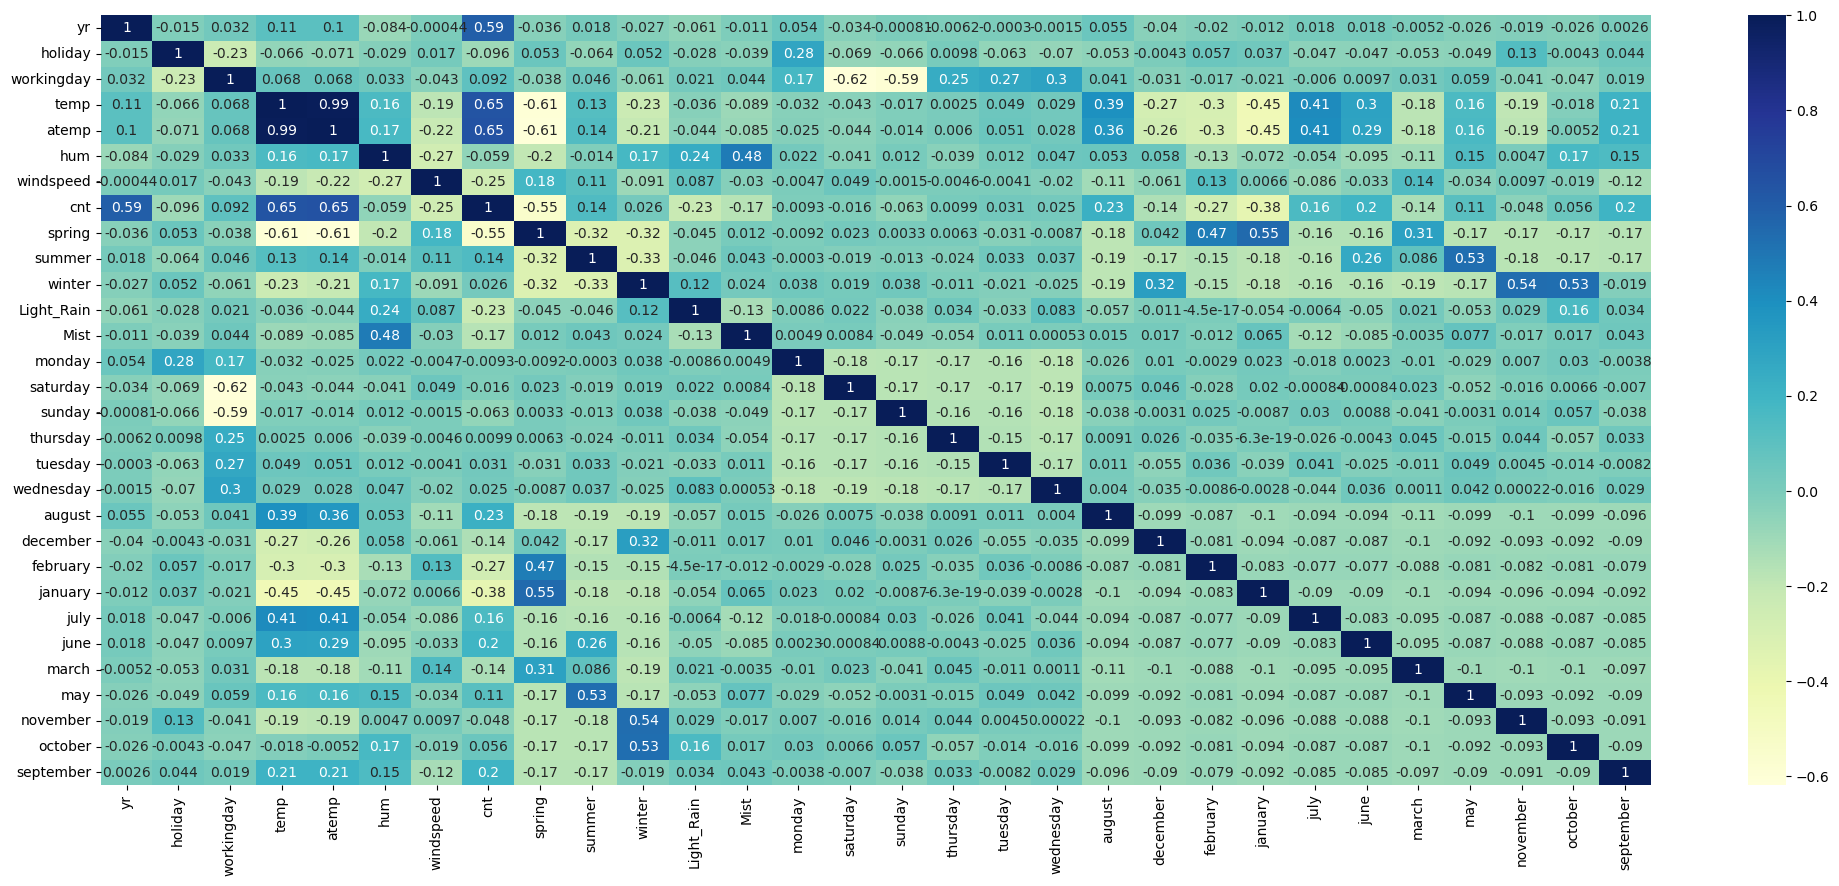

In [36]:
# How to identify how many predictor variable should be used in the model?

# Step 1: check the correlation
plt.figure(figsize=(25,10))
sns.heatmap(df_train.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [37]:
# Creating Training X and y.
y_train = df_train.pop('cnt')
X_train = df_train

#### Using Recursive Feature Elimination (RFE) to identify significant featues.

In [38]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,december,february,january,july,june,march,may,november,october,september
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,0,0,0,0,0,0,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
# Using RFE to identify predictor variables
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)             # Keeting the step broad, keeping it col_count/2
rfe = rfe.fit(X_train, y_train)

In [40]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 14),
 ('winter', True, 1),
 ('Light_Rain', True, 1),
 ('Mist', True, 1),
 ('monday', False, 7),
 ('saturday', True, 1),
 ('sunday', True, 1),
 ('thursday', False, 10),
 ('tuesday', False, 8),
 ('wednesday', False, 11),
 ('august', False, 6),
 ('december', False, 5),
 ('february', False, 9),
 ('january', False, 12),
 ('july', True, 1),
 ('june', False, 13),
 ('march', False, 3),
 ('may', False, 2),
 ('november', False, 4),
 ('october', False, 15),
 ('september', True, 1)]

In [41]:
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'spring', 'winter', 'Light_Rain', 'Mist', 'saturday', 'sunday', 'july',
       'september'],
      dtype='object')

#### Building Model

In [42]:
# Build a model using provided X_train and y_train data.
# returns model summary.
def _build_model(_X_train, _y_train):
    _X_train_sm = sm.add_constant(_X_train)
    
    # create model
    lr = sm.OLS(_y_train, _X_train_sm)

    # fit
    lr_model = lr.fit()
    return lr_model.summary()


# Run VIF on given dataframe and returns the result.
def _vif(_X_train):
    vif = pd.DataFrame()
    vif['Features'] = _X_train.columns
    vif['VIF'] = [variance_inflation_factor(_X_train.values, i) for i in range(_X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = 'VIF', ascending=False)
    return vif

In [43]:
selected_cols = X_train.columns[rfe.support_]
X = X_train[selected_cols]
X.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,winter,Light_Rain,Mist,saturday,sunday,july,september
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,1,1,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,0,0,1,1,0,0,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0,0,0,1,0,0,0,0


#### Iteration-1

In [44]:
_build_model(X, y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.1
Date:                Tue, 17 Dec 2024   Prob (F-statistic):          8.89e-189
Time:                        23:23:16   Log-Likelihood:                 511.35
No. Observations:                 510   AIC:                            -992.7
Df Residuals:                     495   BIC:                            -929.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2422      0.025      9.587      0.000       0.193       0.292
yr             0.2309      0.008     28.456      0.000       0.215       0.247
holiday       -0.0076      0.021     -0.354      0.723      -0.049       0.034
workingday     0.0942      0.009     10.146      0.000       0.076       0.112
temp           0.3613      0.129      2.811      0.005       0.109       0.614
atemp          0.1257      0.135      0.932      0.352      -0.139       0.391
hum           -0.1505      0.038     -3.990      0.000      -0.225      -0.076
windspeed     -0.1648      0.026     -6.375      0.000      -0.216      -0.114
spring        -0.1078      0.015     -7.264      0.000      -0.137      -0.079
winter         0.0549      0.012      4.441      0.000       0.031       0.079
Light_Rain    -0.2480      0.026     -9.377      0.000      -0.300      -0.196
Mist          -0.0575      0.011     -5.465      0.000      -0.078      -0.037
saturday       0.1040      0.011      9.119      0.000       0.082       0.126
sunday         0.0515      0.012      4.290      0.000       0.028       0.075
july          -0.0780      0.017     -4.565      0.000      -0.112      -0.044
september      0.0594      0.015      3.843      0.000       0.029       0.090
==============================================================================
Omnibus:                       62.426   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.374
Skew:                          -0.622   Prob(JB):                     2.47e-35
Kurtosis:                       5.440   Cond. No.                     1.47e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.44e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [45]:
_vif(X)

,Features,VIF
3,temp,52.82
4,atemp,51.48
2,workingday,40.81
11,saturday,9.96
12,sunday,9.67
7,spring,2.55
1,holiday,2.54
5,hum,1.90
8,winter,1.79
10,Mist,1.57


#### Iteration-2
- Dropping atemp as it has high VIF (51.48) and high p-value(0.352)

In [46]:
X = X.drop('atemp', axis=1)

In [47]:
_build_model(X, y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.7
Date:                Tue, 17 Dec 2024   Prob (F-statistic):          9.38e-190
Time:                        23:23:41   Log-Likelihood:                 510.91
No. Observations:                 510   AIC:                            -993.8
Df Residuals:                     496   BIC:                            -934.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2435      0.025      9.653      0.000       0.194       0.293
yr             0.2308      0.008     28.455      0.000       0.215       0.247
holiday       -0.0080      0.021     -0.374      0.709      -0.050       0.034
workingday     0.0948      0.009     10.227      0.000       0.077       0.113
temp           0.4776      0.031     15.613      0.000       0.418       0.538
hum           -0.1482      0.038     -3.938      0.000      -0.222      -0.074
windspeed     -0.1687      0.025     -6.616      0.000      -0.219      -0.119
spring        -0.1080      0.015     -7.280      0.000      -0.137      -0.079
winter         0.0558      0.012      4.528      0.000       0.032       0.080
Light_Rain    -0.2499      0.026     -9.482      0.000      -0.302      -0.198
Mist          -0.0578      0.011     -5.501      0.000      -0.078      -0.037
saturday       0.1046      0.011      9.177      0.000       0.082       0.127
sunday         0.0521      0.012      4.349      0.000       0.029       0.076
july          -0.0782      0.017     -4.571      0.000      -0.112      -0.045
september      0.0591      0.015      3.829      0.000       0.029       0.089
==============================================================================
Omnibus:                       60.956   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.410
Skew:                          -0.606   Prob(JB):                     1.09e-34
Kurtosis:                       5.427   Cond. No.                     1.40e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.53e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [48]:
# Analysing VIF
_vif(X)

,Features,VIF
2,workingday,40.65
10,saturday,9.92
11,sunday,9.64
3,temp,2.99
6,spring,2.55
1,holiday,2.54
4,hum,1.89
7,winter,1.78
9,Mist,1.57
12,july,1.30


#### Iteration-3
- Dropping holiday as it has high p-value

In [49]:
X = X.drop('holiday', axis=1)

In [50]:
_build_model(X, y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.7
Date:                Tue, 17 Dec 2024   Prob (F-statistic):          9.38e-190
Time:                        23:24:03   Log-Likelihood:                 510.91
No. Observations:                 510   AIC:                            -993.8
Df Residuals:                     496   BIC:                            -934.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2355      0.040      5.915      0.000       0.157       0.314
yr             0.2308      0.008     28.455      0.000       0.215       0.247
workingday     0.1028      0.026      4.001      0.000       0.052       0.153
temp           0.4776      0.031     15.613      0.000       0.418       0.538
hum           -0.1482      0.038     -3.938      0.000      -0.222      -0.074
windspeed     -0.1687      0.025     -6.616      0.000      -0.219      -0.119
spring        -0.1080      0.015     -7.280      0.000      -0.137      -0.079
winter         0.0558      0.012      4.528      0.000       0.032       0.080
Light_Rain    -0.2499      0.026     -9.482      0.000      -0.302      -0.198
Mist          -0.0578      0.011     -5.501      0.000      -0.078      -0.037
saturday       0.1125      0.027      4.146      0.000       0.059       0.166
sunday         0.0601      0.027      2.203      0.028       0.006       0.114
july          -0.0782      0.017     -4.571      0.000      -0.112      -0.045
september      0.0591      0.015      3.829      0.000       0.029       0.089
==============================================================================
Omnibus:                       60.956   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.410
Skew:                          -0.606   Prob(JB):                     1.09e-34
Kurtosis:                       5.427   Cond. No.                         24.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
_vif(X)

,Features,VIF
3,hum,29.19
2,temp,17.25
1,workingday,16.91
9,saturday,4.57
4,windspeed,4.52
10,sunday,4.45
5,spring,2.79
8,Mist,2.28
6,winter,2.14
0,yr,2.08


#### Iteration - 4
- Dropping hum due to high VIF value

In [52]:
X = X.drop('hum', axis=1)

In [53]:
_build_model(X, y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     214.3
Date:                Tue, 17 Dec 2024   Prob (F-statistic):          1.26e-187
Time:                        23:24:34   Log-Likelihood:                 503.06
No. Observations:                 510   AIC:                            -980.1
Df Residuals:                     497   BIC:                            -925.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1553      0.035      4.475      0.000       0.087       0.224
yr             0.2344      0.008     28.661      0.000       0.218       0.250
workingday     0.1034      0.026      3.967      0.000       0.052       0.155
temp           0.4493      0.030     14.895      0.000       0.390       0.509
windspeed     -0.1404      0.025     -5.657      0.000      -0.189      -0.092
spring        -0.1118      0.015     -7.441      0.000      -0.141      -0.082
winter         0.0468      0.012      3.808      0.000       0.023       0.071
Light_Rain    -0.2907      0.025    -11.824      0.000      -0.339      -0.242
Mist          -0.0816      0.009     -9.366      0.000      -0.099      -0.064
saturday       0.1148      0.028      4.171      0.000       0.061       0.169
sunday         0.0578      0.028      2.089      0.037       0.003       0.112
july          -0.0711      0.017     -4.120      0.000      -0.105      -0.037
september      0.0559      0.016      3.573      0.000       0.025       0.087
==============================================================================
Omnibus:                       64.352   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.995
Skew:                          -0.644   Prob(JB):                     4.04e-36
Kurtosis:                       5.452   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
_vif(X)

,Features,VIF
1,workingday,13.12
2,temp,12.38
3,windspeed,4.48
8,saturday,3.77
9,sunday,3.54
4,spring,2.44
0,yr,2.07
5,winter,1.78
7,Mist,1.58
10,july,1.37


#### Iteration - 5
- Dropping workingday due to high VIF (13.12)

In [55]:
X = X.drop('workingday', axis=1)

In [56]:
_build_model(X, y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     225.6
Date:                Tue, 17 Dec 2024   Prob (F-statistic):          1.84e-185
Time:                        23:24:53   Log-Likelihood:                 495.11
No. Observations:                 510   AIC:                            -966.2
Df Residuals:                     498   BIC:                            -915.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2558      0.024     10.619      0.000       0.208       0.303
yr             0.2349      0.008     28.308      0.000       0.219       0.251
temp           0.4502      0.031     14.711      0.000       0.390       0.510
windspeed     -0.1425      0.025     -5.661      0.000      -0.192      -0.093
spring        -0.1148      0.015     -7.539      0.000      -0.145      -0.085
winter         0.0435      0.012      3.497      0.001       0.019       0.068
Light_Rain    -0.2860      0.025    -11.478      0.000      -0.335      -0.237
Mist          -0.0797      0.009     -9.026      0.000      -0.097      -0.062
saturday       0.0154      0.012      1.332      0.184      -0.007       0.038
sunday        -0.0415      0.012     -3.468      0.001      -0.065      -0.018
july          -0.0704      0.017     -4.024      0.000      -0.105      -0.036
september      0.0521      0.016      3.289      0.001       0.021       0.083
==============================================================================
Omnibus:                       77.949   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.347
Skew:                          -0.755   Prob(JB):                     3.47e-46
Kurtosis:                       5.752   Cond. No.                         14.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
_vif(X)

,Features,VIF
1,temp,4.72
2,windspeed,4.04
0,yr,2.06
3,spring,1.66
6,Mist,1.52
4,winter,1.41
9,july,1.35
7,saturday,1.22
8,sunday,1.21
10,september,1.20


#### Iteration-6
- Dropping saturday as it has high p-value (0.184)

In [58]:
X = X.drop('saturday', axis=1)

In [59]:
_build_model(X, y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.6
Date:                Tue, 17 Dec 2024   Prob (F-statistic):          2.75e-186
Time:                        23:25:05   Log-Likelihood:                 494.20
No. Observations:                 510   AIC:                            -966.4
Df Residuals:                     499   BIC:                            -919.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2586      0.024     10.768      0.000       0.211       0.306
yr             0.2346      0.008     28.259      0.000       0.218       0.251
temp           0.4493      0.031     14.674      0.000       0.389       0.509
windspeed     -0.1410      0.025     -5.603      0.000      -0.191      -0.092
spring        -0.1147      0.015     -7.528      0.000      -0.145      -0.085
winter         0.0438      0.012      3.522      0.000       0.019       0.068
Light_Rain    -0.2859      0.025    -11.462      0.000      -0.335      -0.237
Mist          -0.0797      0.009     -9.018      0.000      -0.097      -0.062
sunday        -0.0443      0.012     -3.760      0.000      -0.067      -0.021
july          -0.0698      0.018     -3.986      0.000      -0.104      -0.035
september      0.0522      0.016      3.291      0.001       0.021       0.083
==============================================================================
Omnibus:                       73.106   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.558
Skew:                          -0.694   Prob(JB):                     2.31e-45
Kurtosis:                       5.784   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
_vif(X)

,Features,VIF
1,temp,4.67
2,windspeed,4.00
0,yr,2.06
3,spring,1.64
6,Mist,1.52
4,winter,1.40
8,july,1.35
9,september,1.20
7,sunday,1.17
5,Light_Rain,1.08


### Analysis
- None of the VIF is above standard threashold (5).
- All p-values are under acceptable limit (<0.05).

### Conclusion
- R-squared value for this model is 0.832 meaning this model explains 82% of the variance in the training set.
- Prameter used in Iteration-6 can be used to generate final model.

In [61]:
# Final model
X_train_sm = sm.add_constant(X)

# create model
lr = sm.OLS(y_train, X_train_sm)
# fit
lr_model = lr.fit()

## 4. Residual Analysis.

In [62]:
# Calculated y prediction using the model.
y_train_pred = lr_model.predict(X_train_sm)

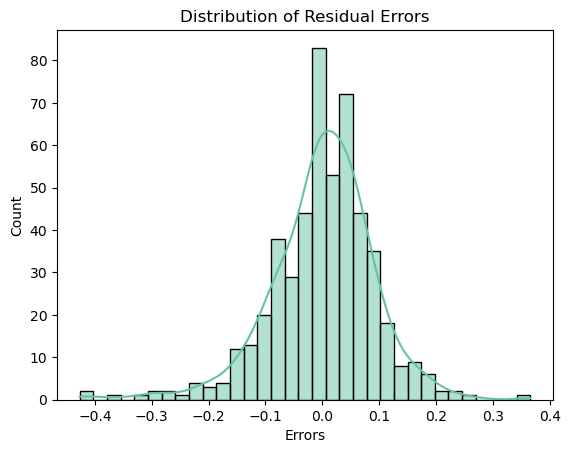

In [64]:
# Calculate residual
res = y_train - y_train_pred
sns.histplot(res, kde=True)
plt.xlabel('Errors')
plt.title('Distribution of Residual Errors')
plt.show()

#### Residual plot follow a normal distribution and is centered around 0

## 5. Predection and Evaluation

In [65]:
# Rescaling test data.
df_test[num_var] = scaler.transform(df_test[num_var])
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,december,february,january,july,june,march,may,november,october,september
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,...,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,...,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [66]:
# creating X and y
y_test = df_test.pop('cnt')
X_test = df_test

In [67]:
# adding constant
X_test_sm = sm.add_constant(X_test)

In [68]:
# Drop columns dropped during interation
valid_cols = X_train_sm.columns
X_test_sm = X_test_sm[valid_cols]
X_test_sm.head()

,const,yr,temp,windspeed,spring,winter,Light_Rain,Mist,sunday,july,september
184,1.0,0,0.831783,0.084219,0,0,0,1,0,1,0
535,1.0,1,0.901354,0.153728,0,0,0,0,0,0,0
299,1.0,0,0.511964,0.334206,0,1,0,1,0,0,0
221,1.0,0,0.881625,0.339570,0,0,0,0,0,0,0
152,1.0,0,0.817246,0.537414,0,0,0,0,0,0,0


In [69]:
# Predict test
y_test_pred = lr_model.predict(X_test_sm)

In [70]:
# Evaluate
r2_score(y_true=y_test, y_pred=y_test_pred)

0.8091992919519853

#### Evaluation: 
- The model explains 81% of the variance present in test set.
- It is 2% less than the training set which is under acceptable range.

#### Model Evaluation

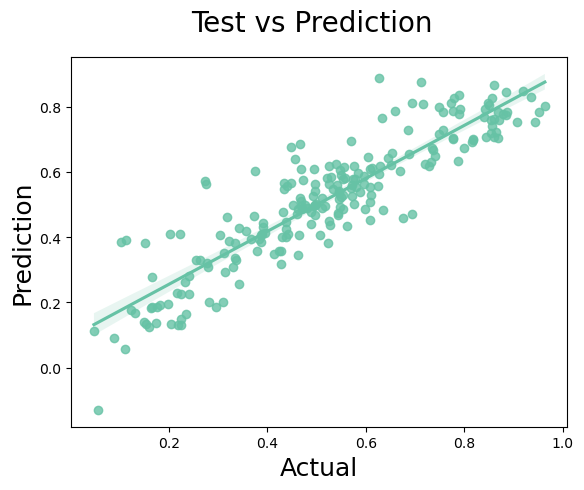

In [71]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
sns.regplot(x=y_test, y=y_test_pred)
fig.suptitle('Test vs Prediction', fontsize=20)
plt.xlabel('Actual', fontsize=18)
plt.ylabel('Prediction', fontsize=18)
plt.show()

This spread seems to follow a linear path.

## Interpretation of the Model

In [72]:
lr_model.params

const         0.258592
yr            0.234574
temp          0.449323
windspeed    -0.141044
spring       -0.114692
winter        0.043831
Light_Rain   -0.285866
Mist         -0.079670
sunday       -0.044329
july         -0.069784
september     0.052198
dtype: float64

### So to answer question from the begining;

### Which variables are significant in predicting the demand for shared bikes?
- yr           
- temp         
- windspeed   
- spring      
- winter       
- Light_Rain   
- Mist         
- sunday      
- july        
- september    


### How well those variables describe the bike demands?
The significance of each significant variable can be identified by the following formula:

cnt = 0.258592 + yr * 0.234574 + temp * 0.449323 + windspeed * -0.141044 + spring * -0.114692 + winter * 0.043831 + Light_Rain * -0.285866 + Mist * -0.079670 + sunday * -0.044329 + july * -0.069784 + september * 0.052198 